In [105]:
import torch, pickle, matplotlib as mpl, gzip
from pathlib import Path
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

mpl.rcParams['image.cmap'] = 'gray'

In [2]:
data = None
with gzip.open('data/mnist.pkl.gz', 'rb') as f:
    data = pickle.load(f, encoding='latin')

In [3]:
((x_train, y_train), (x_val, y_val), _) = data
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((50000, 784), (50000,), (10000, 784), (10000,))

In [4]:
(x_train, y_train, x_val, y_val) = map(torch.tensor, (x_train, y_train, x_val, y_val))
x_train.shape, y_train.shape, x_val.shape, y_val.shape

(torch.Size([50000, 784]),
 torch.Size([50000]),
 torch.Size([10000, 784]),
 torch.Size([10000]))

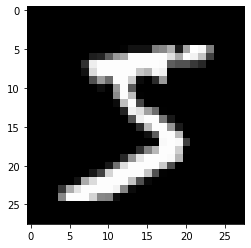

In [8]:
plt.imshow(x_train[0].view(28, 28))

In [10]:
class Model(nn.Module):
    def __init__(self, nin, nh, nout):
        super().__init__()
        self.layers = [nn.Linear(nin, nh), nn.ReLU(nh), nn.Linear(nh, nout)]
    
    def __call__(self, x):
        for l in self.layers:
            x = l(x)
        return x

In [18]:
m, n = x_train.shape
c = y_train.max() + 1
nh = 50
nout = 10

In [19]:
model = Model(n, nh, nout)

In [20]:
pred = model(x_train)

In [21]:
pred.shape

torch.Size([50000, 10])

In [51]:
def log_softmax(x):
    return (x.exp()/x.exp().sum(1, keepdim=True)).log()

In [52]:
log_softmax(pred)

tensor([[-2.2446, -2.4244, -2.4216,  ..., -2.2878, -2.4068, -2.3208],
        [-2.3862, -2.3740, -2.3016,  ..., -2.2498, -2.3517, -2.4064],
        [-2.3970, -2.4087, -2.2812,  ..., -2.3484, -2.4407, -2.3838],
        ...,
        [-2.3303, -2.4678, -2.2690,  ..., -2.4128, -2.2866, -2.4098],
        [-2.2764, -2.4901, -2.2623,  ..., -2.3608, -2.3901, -2.3783],
        [-2.3099, -2.3961, -2.2686,  ..., -2.3862, -2.3096, -2.4644]],
       grad_fn=<LogBackward0>)

In [53]:
def log_softmax(x):
    return x - (x.exp().sum(1, keepdim=True)).log()

In [54]:
log_softmax(pred)

tensor([[-2.2446, -2.4244, -2.4216,  ..., -2.2878, -2.4068, -2.3208],
        [-2.3862, -2.3740, -2.3016,  ..., -2.2498, -2.3517, -2.4064],
        [-2.3970, -2.4087, -2.2812,  ..., -2.3484, -2.4407, -2.3838],
        ...,
        [-2.3303, -2.4678, -2.2690,  ..., -2.4128, -2.2866, -2.4098],
        [-2.2764, -2.4901, -2.2623,  ..., -2.3608, -2.3901, -2.3783],
        [-2.3099, -2.3961, -2.2686,  ..., -2.3862, -2.3096, -2.4644]],
       grad_fn=<SubBackward0>)

In [77]:
def logexpsum(x):
    m = x.max(1, keepdim=True)[0]
    return m + (x - m).exp().sum(1, keepdim=True).log()

In [79]:
def log_softmax(x):
    return x - logexpsum(x)

In [80]:
log_softmax(pred)

tensor([[-2.2446, -2.4244, -2.4216,  ..., -2.2878, -2.4068, -2.3208],
        [-2.3862, -2.3740, -2.3016,  ..., -2.2498, -2.3517, -2.4064],
        [-2.3970, -2.4087, -2.2812,  ..., -2.3484, -2.4407, -2.3838],
        ...,
        [-2.3303, -2.4678, -2.2690,  ..., -2.4128, -2.2866, -2.4098],
        [-2.2764, -2.4901, -2.2623,  ..., -2.3608, -2.3901, -2.3783],
        [-2.3099, -2.3961, -2.2686,  ..., -2.3862, -2.3096, -2.4644]],
       grad_fn=<SubBackward0>)

In [81]:
def log_softmax(x):
    return x - x.logsumexp(1, keepdim=True)

In [82]:
log_softmax(pred)

tensor([[-2.2446, -2.4244, -2.4216,  ..., -2.2878, -2.4068, -2.3208],
        [-2.3862, -2.3740, -2.3016,  ..., -2.2498, -2.3517, -2.4064],
        [-2.3970, -2.4087, -2.2812,  ..., -2.3484, -2.4407, -2.3838],
        ...,
        [-2.3303, -2.4678, -2.2690,  ..., -2.4128, -2.2866, -2.4098],
        [-2.2764, -2.4901, -2.2623,  ..., -2.3608, -2.3901, -2.3783],
        [-2.3099, -2.3961, -2.2686,  ..., -2.3862, -2.3096, -2.4644]],
       grad_fn=<SubBackward0>)

In [83]:
sm_pred = log_softmax(pred)

In [84]:
sm_pred

tensor([[-2.2446, -2.4244, -2.4216,  ..., -2.2878, -2.4068, -2.3208],
        [-2.3862, -2.3740, -2.3016,  ..., -2.2498, -2.3517, -2.4064],
        [-2.3970, -2.4087, -2.2812,  ..., -2.3484, -2.4407, -2.3838],
        ...,
        [-2.3303, -2.4678, -2.2690,  ..., -2.4128, -2.2866, -2.4098],
        [-2.2764, -2.4901, -2.2623,  ..., -2.3608, -2.3901, -2.3783],
        [-2.3099, -2.3961, -2.2686,  ..., -2.3862, -2.3096, -2.4644]],
       grad_fn=<SubBackward0>)

In [101]:
sm_pred[[0, 1, 2], y_train[:3]]

tensor([-2.2473, -2.3862, -2.2561], grad_fn=<IndexBackward0>)

In [94]:
y_train[:3]

tensor([5, 0, 4])

In [102]:
def nll(input, target):
    return -(input[range(input.shape[0]), target]).mean()

In [104]:
loss = nll(sm_pred, y_train)
loss

tensor(2.3178, grad_fn=<NegBackward0>)

In [107]:
F.nll_loss(F.log_softmax(pred, 1), y_train)

tensor(2.3178, grad_fn=<NllLossBackward0>)

In [108]:
F.cross_entropy(pred, y_train)

tensor(2.3178, grad_fn=<NllLossBackward0>)

In [109]:
loss_func = F.cross_entropy

In [113]:
bs = 50
xb = x_train[:bs]
yb = y_train[:bs]
preds = model(xb)
preds[0]

tensor([ 0.0271, -0.1528, -0.1500, -0.0052, -0.0646,  0.0244,  0.1677, -0.0161,
        -0.1351, -0.0491], grad_fn=<SelectBackward0>)

In [114]:
loss_func(preds, yb)

tensor(2.3221, grad_fn=<NllLossBackward0>)

In [115]:
yb

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3])

In [116]:
preds.argmax(1)

tensor([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 6, 5, 6, 2, 6, 6, 6, 6, 6,
        4, 6, 5, 6, 6, 4, 6, 4, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 4,
        6, 6])

In [117]:
def accuracy(out, yb):
    return (out.argmax(1) == yb).float().mean()

In [118]:
accuracy(preds, yb)

tensor(0.0600)

In [119]:
lr = 0.5
epochs = 3

In [121]:
def report(loss, preds, yb): 
    print(f'loss: {loss:.2f}, accuracy: {accuracy(preds, yb):.2f}')

In [122]:
xb, yb = x_train[:bs], y_train[:bs]
preds = model(xb)
report(loss_func(preds, yb), preds, yb)

loss: 2.32, accuracy: 0.06


In [133]:
for epoch in range(epochs):
    for i in range(0, m, bs):
        s = slice(i, min(m, i+bs))
        xb,yb = x_train[s],y_train[s]
        preds = model(xb)
        loss = loss_func(preds, yb)
        loss.backward()
        with torch.no_grad():
            for l in model.layers:
                if hasattr(l, 'weight'):
                    l.weight -= l.weight.grad * lr
                    l.bias == l.bias.grad * lr
                    l.weight.grad.zero_()
                    l.bias.grad.zero_()
    report(loss, preds, yb)     

loss: 0.05, accuracy: 0.98
loss: 0.05, accuracy: 0.98
loss: 0.05, accuracy: 0.98


In [134]:
m1 = nn.Module()

In [136]:
m1.foo = nn.Linear(3, 4)

In [137]:
m1

Module(
  (foo): Linear(in_features=3, out_features=4, bias=True)
)

In [140]:
list(m1.named_children())

[('foo', Linear(in_features=3, out_features=4, bias=True))]

In [141]:
list(m1.parameters())

[Parameter containing:
 tensor([[ 0.3285, -0.1131,  0.0071],
         [ 0.1433,  0.1641, -0.1538],
         [ 0.0191, -0.2399,  0.5618],
         [-0.3817,  0.3038, -0.5740]], requires_grad=True),
 Parameter containing:
 tensor([-0.0576,  0.4018, -0.1471,  0.0139], requires_grad=True)]

In [160]:
class MLP(nn.Module):
    def __init__(self, nin, nh, nout):
        super().__init__()
        self.l1 = nn.Linear(nin, nh)
        self.relu = nn.ReLU(nh)
        self.l2 = nn.Linear(nh, nout)
    
    def forward(self, x):
        return self.l2(self.relu(self.l1(x)))

In [161]:
model = MLP(n, nh, nout)

In [162]:
model

MLP(
  (l1): Linear(in_features=784, out_features=50, bias=True)
  (relu): ReLU(inplace=True)
  (l2): Linear(in_features=50, out_features=10, bias=True)
)

In [163]:
for name, l in model.named_children():
    print(f'name: {name}, {l}')

name: l1, Linear(in_features=784, out_features=50, bias=True)
name: relu, ReLU(inplace=True)
name: l2, Linear(in_features=50, out_features=10, bias=True)


In [164]:
for p in model.parameters():
    print(p.shape)

torch.Size([50, 784])
torch.Size([50])
torch.Size([10, 50])
torch.Size([10])


In [169]:
def fit():
    for epoch in range(epochs):
        for i in range(0, m, bs):
            s = slice(i, min(m, i+bs))
            xb,yb = x_train[s], y_train[s]
            preds = model(xb)
            loss = loss_func(preds, yb)
            loss.backward()
            with torch.no_grad():
                for p in model.parameters():
                    p -= p.grad * lr
                model.zero_grad()
        report(loss, preds, yb)                 

In [170]:
fit()

loss: 0.08, accuracy: 0.98
loss: 0.04, accuracy: 1.00
loss: 0.02, accuracy: 1.00


In [185]:
class MyModule:
    def __init__(self, nin, nh, nout):
        self._modules = {}
        self.l1 = nn.Linear(nin, nh)
        self.relu = nn.ReLU(nh)
        self.l2 = nn.Linear(nh, nout)
    
    def __setattr__(self, k, v):
        if not k.startswith('_'):
            self._modules[k] = v
        super().__setattr__(k, v)
    
    def __repr__(self):
        return f'{self._modules}'
    
    def parameters(self,):
        for l in self._modules.values():
            yield from l.parameters()


In [186]:
mdl = MyModule(n, nh, 10)

In [187]:
mdl

{'l1': Linear(in_features=784, out_features=50, bias=True), 'relu': ReLU(inplace=True), 'l2': Linear(in_features=50, out_features=10, bias=True)}

In [188]:
for p in mdl.parameters():
    print(p.shape)

torch.Size([50, 784])
torch.Size([50])
torch.Size([10, 50])
torch.Size([10])


In [191]:
layers = [nn.Linear(n, nh), nn.ReLU(nh), nn.Linear(nh, nout)]

In [198]:
class Model(nn.Module):
    def __init__(self, layers):
        super().__init__()
        self.layers = layers
        for i, l in enumerate(self.layers):
            self.add_module(f'layer_{i}', l)
    
    def forward(self, x):
        for l in self.layers:
            x = l(x)
        return x

In [199]:
model = Model(layers)

In [200]:
model

Model(
  (layer_0): Linear(in_features=784, out_features=50, bias=True)
  (layer_1): ReLU(inplace=True)
  (layer_2): Linear(in_features=50, out_features=10, bias=True)
)

In [202]:
model(xb).shape

torch.Size([50, 10])

In [203]:
from functools import reduce

In [204]:
class Model(nn.Module):
    def __init__(self, layers):
        super().__init__()
        self.layers = layers
        for i, l in enumerate(self.layers):
            self.add_module(f'layer_{i}', l)
    
    def forward(self, x):
        return reduce(lambda x, layer: layer(x), self.layers, x)

In [205]:
model = Model(layers)
model

Model(
  (layer_0): Linear(in_features=784, out_features=50, bias=True)
  (layer_1): ReLU(inplace=True)
  (layer_2): Linear(in_features=50, out_features=10, bias=True)
)

In [206]:
model(xb).shape

torch.Size([50, 10])

In [222]:
class SequentialModel(nn.Module):
    def __init__(self, layers):
        super().__init__()
        self.layers = nn.ModuleList(layers)
    
    def forward(self, x):
        for l in self.layers:
            x = l(x)
        return x

In [227]:
model = SequentialModel(layers)

In [228]:
model

SequentialModel(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=50, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=50, out_features=10, bias=True)
  )
)

In [229]:
model(xb).shape

torch.Size([50, 10])

In [230]:
fit()

loss: 0.08, accuracy: 0.96
loss: 0.05, accuracy: 0.98
loss: 0.05, accuracy: 0.98


In [232]:
model = nn.Sequential(*layers)

In [233]:
model

Sequential(
  (0): Linear(in_features=784, out_features=50, bias=True)
  (1): ReLU(inplace=True)
  (2): Linear(in_features=50, out_features=10, bias=True)
)

In [234]:
fit()

loss: 0.15, accuracy: 0.94
loss: 0.00, accuracy: 1.00
loss: 0.06, accuracy: 0.98


In [246]:
class Optimizer():
    def __init__(self, params, lr=0.5):
        self.lr = lr
        self.params = list(params)
    
    def step(self):
        with torch.no_grad():
            for p in self.params:
                p -= self.lr * p.grad
    
    def zero_grad(self):
        for p in self.params:
            p.grad.data.zero_()

In [247]:
model = nn.Sequential(*[nn.Linear(n, nh), nn.ReLU(nh), nn.Linear(nh, nout)])

In [248]:
model

Sequential(
  (0): Linear(in_features=784, out_features=50, bias=True)
  (1): ReLU(inplace=True)
  (2): Linear(in_features=50, out_features=10, bias=True)
)

In [249]:
optim = Optimizer(model.parameters(), lr)

In [250]:
for epoch in range(epochs):
    for i in range(0, m, bs):
        s = slice(0, min(m, i+bs))
        xb, yb = x_train[s], y_train[s]
        preds = model(xb)
        loss = loss_func(preds, yb)
        loss.backward()
        optim.step()
        optim.zero_grad()
    report(loss, preds, yb)

loss: 0.11, accuracy: 0.97
loss: 0.07, accuracy: 0.98
loss: 0.06, accuracy: 0.99


In [262]:
def get_model():
    model = nn.Sequential(*[nn.Linear(n, nh), nn.ReLU(nh), nn.Linear(nh, 10)])
    optim = Optimizer(model.parameters(), lr)
    return model, optim

In [263]:
model, optim = get_model()

In [264]:
loss_func(model(xb), yb)

tensor(2.3182, grad_fn=<NllLossBackward0>)

In [254]:
class Dataset():
    def __init__(self, x, y):
        self.x, self.y = x, y
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, i):
        return self.x[i], self.y[i]

In [255]:
train_ds, val_ds = Dataset(x_train, y_train), Dataset(x_val, y_val)

In [256]:
assert len(train_ds) == len(x_train)

In [257]:
xb, yb = train_ds[:50]

In [259]:
xb.shape, yb.shape

(torch.Size([50, 784]), torch.Size([50]))

In [265]:
model, optim = get_model()

In [266]:
for epoch in range(epochs):
    for i in range(0, m, bs):
        xb, yb = train_ds[i:i+bs]
        preds = model(xb)
        loss = loss_func(preds, yb)
        loss.backward()
        optim.step()
        optim.zero_grad()
    report(loss, preds, yb)

loss: 0.12, accuracy: 0.96
loss: 0.08, accuracy: 0.98
loss: 0.05, accuracy: 1.00


In [273]:
class DataLoader():
    def __init__(self, ds, bs):
        self.ds, self.bs = ds, bs
    
    def __iter__(self):
        for i in range(0, len(self.ds), self.bs):
            yield self.ds[i:i+self.bs]

In [274]:
train_dl = DataLoader(train_ds, bs)
val_dl = DataLoader(val_ds, bs)

In [275]:
xb, yb = next(iter(train_dl))

In [276]:
xb.shape, yb.shape

(torch.Size([50, 784]), torch.Size([50]))

tensor(5)

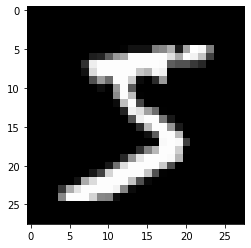

In [278]:
plt.imshow(xb[0].view(28, 28))
yb[0]

In [282]:
model, optim = get_model()

In [283]:
def fit():
    for epoch in range(epochs):
        for xb, yb, in train_dl:
            preds = model(xb)
            loss = loss_func(preds, yb)
            loss.backward()
            
            optim.step()
            optim.zero_grad()
        report(loss, preds, yb)

In [284]:
fit()

loss: 0.15, accuracy: 0.96
loss: 0.08, accuracy: 0.96
loss: 0.07, accuracy: 0.96


In [290]:
import random
from itertools import islice

In [318]:
class Sampler:
    def __init__(self, ds, shuffle=False):
        self.n, self.shuffle = len(ds), shuffle
    
    def __iter__(self):
        res = list(range(self.n))
        if self.shuffle:
            random.shuffle(res)
        return iter(res)

In [319]:
ss = Sampler(train_ds)

In [320]:
it = iter(ss)

In [321]:
for ele in range(5):
    print(next(it))

0
1
2
3
4


In [322]:
list(islice(ss, 5))

[0, 1, 2, 3, 4]

In [323]:
import fastcore.all as fc

In [324]:
class BatchSampler():
    def __init__(self, sampler, bs, drop_last=False):
        fc.store_attr()
    
    def __iter__(self):
        yield from fc.chunked(iter(self.sampler), self.bs, drop_last= self.drop_last)

In [325]:
batches = BatchSampler(ss, 4)

In [326]:
list(islice(batches, 5))

[[0, 1, 2, 3],
 [4, 5, 6, 7],
 [8, 9, 10, 11],
 [12, 13, 14, 15],
 [16, 17, 18, 19]]

In [327]:
def collate(b):
    xs, ys = zip(*b)
    return torch.stack(xs), torch.stack(ys)

In [332]:
class DataLoader():
    def __init__(self, ds, batches, collate_fn=collate):
        fc.store_attr()
    
    def __iter__(self):
        yield from (self.collate_fn(self.ds[i] for i in b) for b in self.batches)       

In [333]:
train_samp = BatchSampler(Sampler(train_ds, shuffle=True), bs)
val_samp = BatchSampler(Sampler(val_ds, shuffle=True), bs)

In [334]:
train_dl = DataLoader(train_ds, train_samp, collate_fn=collate)
val_dl = DataLoader(val_ds, val_samp, collate_fn=collate)

In [343]:
print(next(iter(train_dl))[0][0].shape)

torch.Size([784])


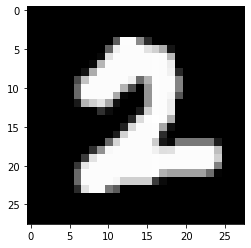

In [344]:
plt.imshow(next(iter(train_dl))[0][0].view(28, 28))

In [345]:
xb, yb = next(iter(train_dl))

In [346]:
xb.shape, yb.shape

(torch.Size([50, 784]), torch.Size([50]))

tensor(0)

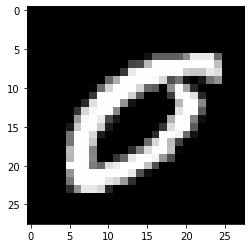

In [348]:
plt.imshow(xb[1].view(28, 28))
yb[1]

In [349]:
model, opt = get_model()

In [350]:
fit()

loss: 2.29, accuracy: 0.14
loss: 2.31, accuracy: 0.06
loss: 2.30, accuracy: 0.12


In [353]:
import torch.multiprocessing as mp
from fastcore.basics import store_attr

In [354]:
train_ds[[1, 4, 5]]

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([0, 9, 2]))

In [355]:
train_ds.__getitem__([1, 4, 5])

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([0, 9, 2]))

In [359]:
for ele in map(train_ds.__getitem__, ([3, 4, 200], [5, 6])):
    print(ele)

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), tensor([1, 9, 1]))
(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), tensor([2, 1]))


In [360]:
class DataLoader:
    def __init__(self, ds, batches, n_workers=1, collate_f=collate):
        fc.store_attr()
    
    def __iter__(self):
        with mp.Pool(self.n_workers) as ex:
            yield from ex.map(self.ds.__getitem__, iter(self.batches))

In [361]:
train_dl = DataLoader(train_ds, batches)

In [362]:
it = iter(train_dl)

In [367]:
xb, yb = next(it)

In [368]:
xb.shape, yb.shape

(torch.Size([4, 784]), torch.Size([4]))

In [381]:
mp.cpu_count()

8